In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

<h1>Data Cleaning</h1>

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
df.nunique()

LoanID            255347
Age                   52
Income            114620
LoanAmount        158729
CreditScore          550
MonthsEmployed       120
NumCreditLines         4
InterestRate        2301
LoanTerm               5
DTIRatio              81
Education              4
EmploymentType         4
MaritalStatus          3
HasMortgage            2
HasDependents          2
LoanPurpose            5
HasCoSigner            2
Default                2
dtype: int64

In [8]:
df = df.drop(["LoanID"], axis=1)

In [9]:
df["Default"].sum() / df.shape[0]

np.float64(0.11612824901017048)

<h2>Missing Value</h2>

In [10]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

<h1>Visualization</h1>

In [11]:
def show_numeric(cols, n_cols=4):
    n_rows = int(np.ceil(len(cols) / n_cols))

    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        sns.boxplot(x='Default', y=col, data=df, color='skyblue', ax=axes[i])
        axes[i].set_title(col, fontsize=12)
        
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

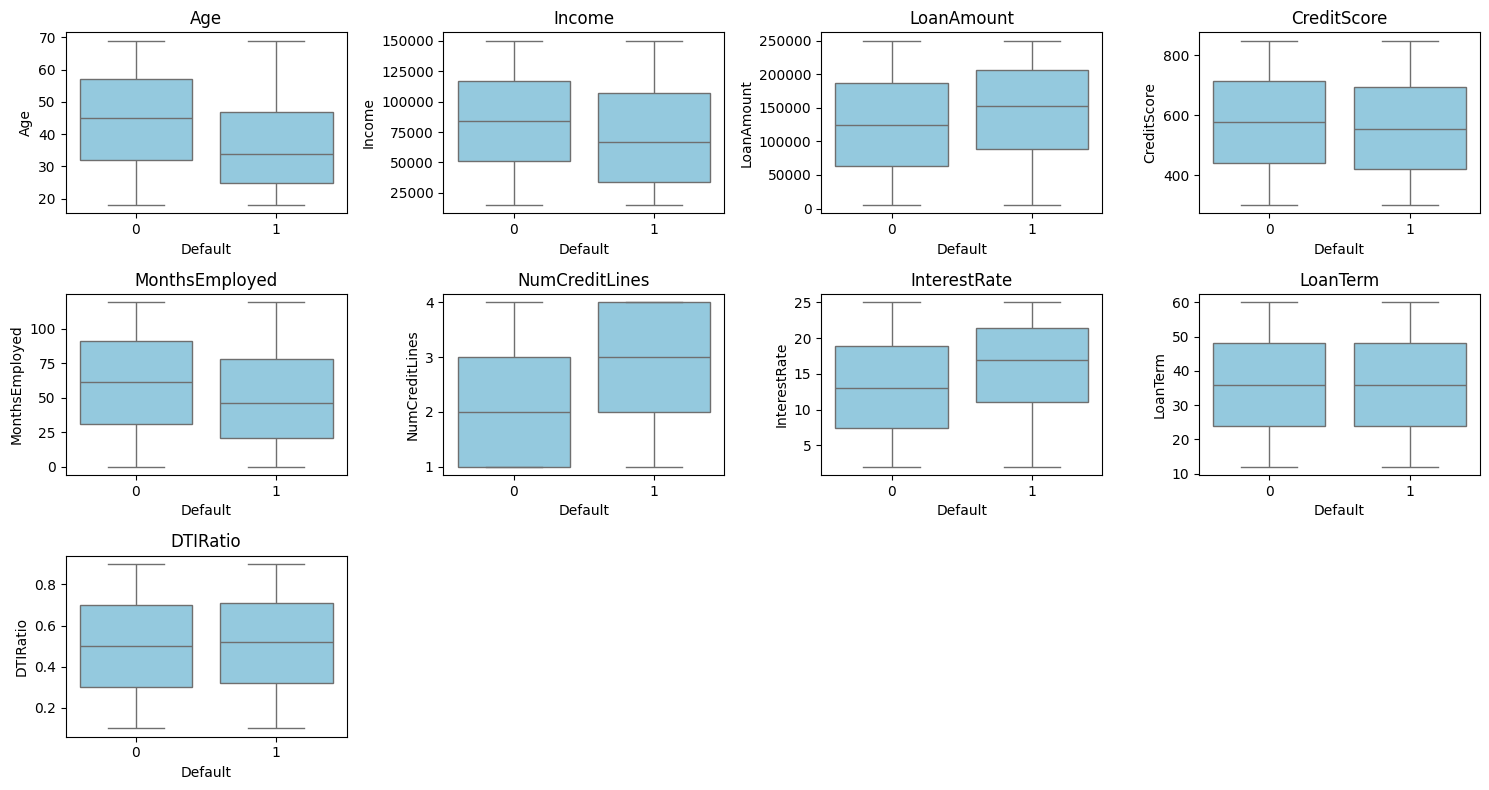

In [12]:
numeric_cols_all = df.select_dtypes(include=np.number).columns
numeric_cols = []
for col in numeric_cols_all:
    if col != "Default":
        numeric_cols.append(col)
show_numeric(numeric_cols)

In [13]:
def show_categorical(cols, n_cols=4):
    n_rows = int(np.ceil(len(cols) / n_cols))

    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        sns.countplot(x=col, hue='Default', data=df, palette="dark:skyblue", ax=axes[i])
        axes[i].set_title(col, fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

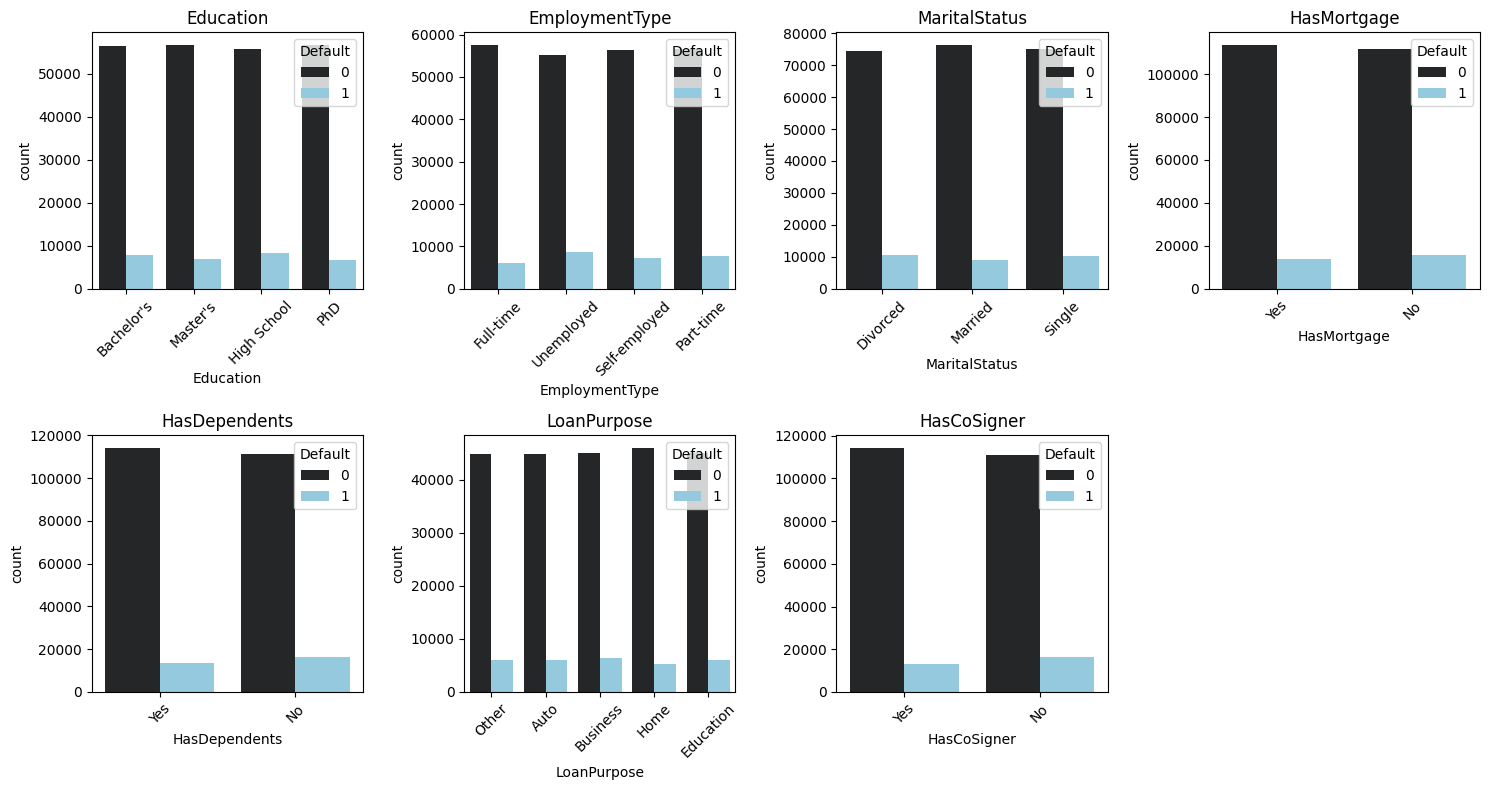

In [14]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
show_categorical(categorical_cols)

<h1>Models</h1>

In [15]:
X = df.drop('Default', axis=1)
y = df['Default']

In [16]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [17]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Education_High School         255347 non-null  bool   
 10  Education_Master's            255347 non-null  bool   
 11  Education_PhD                 255347 non-null  bool   
 12  EmploymentType_Part-time      255347 non-nul

In [18]:
boolean_columns = X_encoded.select_dtypes(include='bool').columns

for col in boolean_columns:
    X_encoded[col] = X_encoded[col].astype(int)

In [19]:
X = X_encoded

In [20]:
def normalize_col(col):
    X[col]=(X[col]-X[col].mean())/X[col].std()

In [21]:
cols_to_normalize = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "NumCreditLines", 
                  "InterestRate", "LoanTerm", "DTIRatio"]
for col in X.columns:
    normalize_col(col)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [24]:
def evaluate(y_label, y_pred, show_confusion_m=False):
    print("Accuracy:", accuracy_score(y_label, y_pred))
    print("\nClassification Report:\n", classification_report(y_label, y_pred, zero_division=0))
    
    if show_confusion_m:
        cm_lr = confusion_matrix(y_label, y_pred)
        sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

def evaluate_model(model, show_confusion_m=False):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("\nTraining\n")
    evaluate(y_train, y_pred_train, show_confusion_m)

    print("\nTest\n")
    evaluate(y_test, y_pred_test, show_confusion_m)

def evaluate_regression_pred(y_label, y_pred_prob, show_confusion_m, threshold):
    mse = mean_squared_error(y_label, y_pred_prob)
    r2 = r2_score(y_label, y_pred_prob)
    
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)

    y_pred = np.where(y_pred_prob < threshold, 0, 1)

    evaluate(y_label, y_pred, show_confusion_m)

def evaluate_regression_model(model, show_confusion_m=False, threshold=0.5):

    y_pred_prob_train = model.predict(X_train)
    y_pred_prob_test = model.predict(X_test)
      
    print("\nTraining\n")
    evaluate_regression_pred(y_train, y_pred_prob_train, show_confusion_m, threshold)

    print("\nTest\n")
    evaluate_regression_pred(y_test, y_pred_prob_test, show_confusion_m, threshold)

def find_and_evaluate_best(model, param_grid, is_regression_model=False):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='f1',
        cv=cv,
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(X_train, y_train)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation F1 Score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    best_model.fit(X_train_resampled, y_train_resampled)

    if is_regression_model:
        evaluate_regression_model(best_model)
    else:
        evaluate_model(best_model)

    return best_model

def plot_precision_recall(model, predict_prob):
    steps = 20
    d = 1 / 20
    y_pred_prob = predict_prob(model, X_test)
    precision = []
    recall = []
    f1 = []
    for inc in range(20):
        threshold = (inc + 1) * d
        y_pred = np.where(y_pred_prob < threshold, 0, 1)
        precision.append(precision_score(y_test, y_pred, average=None, zero_division=0)[1])
        recall.append(recall_score(y_test, y_pred, average=None, zero_division=0)[1])
        f1.append(f1_score(y_test, y_pred, average=None, zero_division=0)[1])

    
    best_index = np.argmax(f1)
    best_threshold = (best_index + 1) * d
    
    thresholds = np.linspace(1/20, 1, 20)

    plt.plot(thresholds, precision, label='Precision', marker='o')
    plt.plot(thresholds, recall, label='Recall', marker='s')
    plt.plot(thresholds, f1, label='F1', marker='o')
    plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')

    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    
    plt.show()

    print(f"{'Best Threshold for F1':<25} {best_threshold:.3f}")
    print(f"{'Best F1':<25} {f1[best_index]:.3f}")
    print(f"{'Best Recall':<25} {recall[best_index]:.3f}")
    print(f"{'Best Precision':<25} {precision[best_index]:.3f}")
    

<h2>Linear Regression<span style="font-size: 12px">view as a regression task</span></h2>

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_linear_reg = LinearRegression()
model_linear_reg.fit(X_train, y_train)

LinearRegression()

In [26]:
evaluate_regression_model(model_linear_reg)


Training

Mean Squared Error: 0.0943229436982133
R2 Score: 0.08104241375278487
Accuracy: 0.8838733680247899

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94    180555
           1       0.00      0.00      0.00     23722

    accuracy                           0.88    204277
   macro avg       0.44      0.50      0.47    204277
weighted avg       0.78      0.88      0.83    204277


Test

Mean Squared Error: 0.09390955651488833
R2 Score: 0.08512523690216389
Accuracy: 0.8838652829449775

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45139
           1       0.00      0.00      0.00      5931

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070



In [27]:
evaluate_regression_model(model_linear_reg, threshold=0.3)


Training

Mean Squared Error: 0.0943229436982133
R2 Score: 0.08104241375278487
Accuracy: 0.8841328196517474

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94    180555
           1       0.51      0.09      0.15     23722

    accuracy                           0.88    204277
   macro avg       0.70      0.54      0.55    204277
weighted avg       0.85      0.88      0.85    204277


Test

Mean Squared Error: 0.09390955651488833
R2 Score: 0.08512523690216389
Accuracy: 0.8843156451928725

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.51      0.09      0.15      5931

    accuracy                           0.88     51070
   macro avg       0.70      0.54      0.55     51070
weighted avg       0.85      0.88      0.85     51070



In [28]:
def predict_prob_reg(model, X_test):
    return model.predict(X_test)

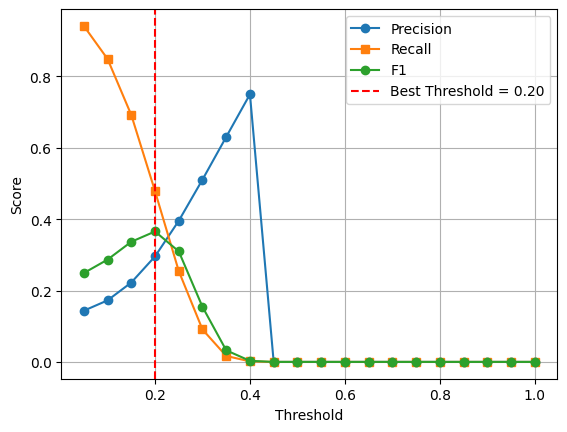

Best Threshold for F1     0.200
Best F1                   0.366
Best Recall               0.479
Best Precision            0.296


In [29]:
plot_precision_recall(model_linear_reg, predict_prob_reg)

In [30]:
model_linear_reg_resampled = LinearRegression()
model_linear_reg_resampled.fit(X_train_resampled, y_train_resampled)

LinearRegression()

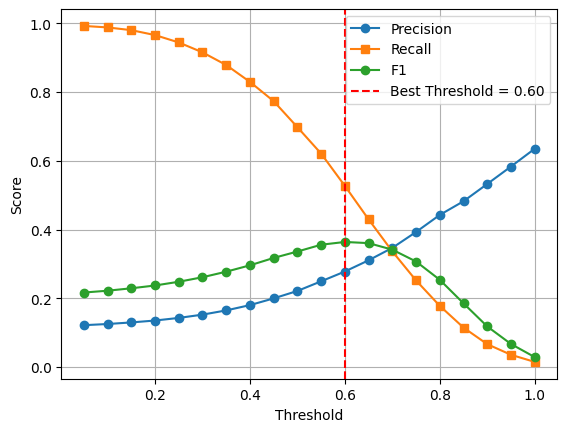

Best Threshold for F1     0.600
Best F1                   0.364
Best Recall               0.527
Best Precision            0.278


In [31]:
plot_precision_recall(model_linear_reg_resampled, predict_prob_reg)

In [32]:
evaluate_regression_model(model_linear_reg_resampled, threshold=0.6)


Training

Mean Squared Error: 0.20380294723421175
R2 Score: -0.9855854484317523
Accuracy: 0.7853013310357995

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87    180555
           1       0.27      0.51      0.35     23722

    accuracy                           0.79    204277
   macro avg       0.60      0.66      0.61    204277
weighted avg       0.85      0.79      0.81    204277


Test

Mean Squared Error: 0.204046757197352
R2 Score: -0.9878405945002358
Accuracy: 0.7859408654787546

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     45139
           1       0.28      0.53      0.36      5931

    accuracy                           0.79     51070
   macro avg       0.60      0.67      0.62     51070
weighted avg       0.85      0.79      0.81     51070



<h2>Logistic Regression</h2>

In [33]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [34]:
def predict_prob_logistic(model, X_test):
    return model.predict_proba(X_test)[:, 1]

In [35]:
evaluate_model(model_logistic)


Training

Accuracy: 0.885102091767551

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94    180555
           1       0.59      0.03      0.06     23722

    accuracy                           0.89    204277
   macro avg       0.74      0.52      0.50    204277
weighted avg       0.85      0.89      0.84    204277


Test

Accuracy: 0.885275112590562

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.61      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.50     51070
weighted avg       0.85      0.89      0.84     51070



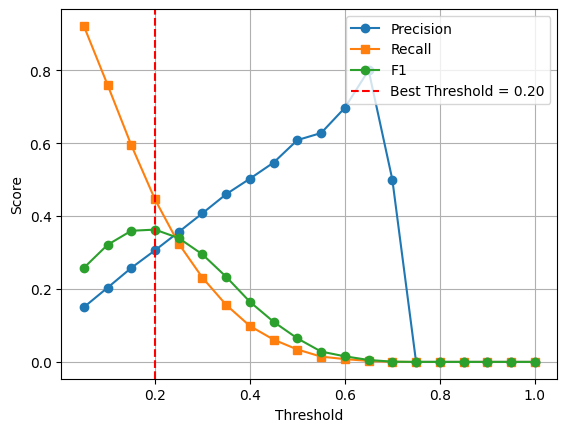

Best Threshold for F1     0.200
Best F1                   0.363
Best Recall               0.445
Best Precision            0.306


In [36]:
plot_precision_recall(model_logistic, predict_prob_logistic)

In [37]:
model_logistic_resampled = LogisticRegression()
model_logistic_resampled.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [38]:
evaluate_model(model_logistic_resampled)


Training

Accuracy: 0.6833564228963613

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79    180555
           1       0.22      0.68      0.33     23722

    accuracy                           0.68    204277
   macro avg       0.58      0.68      0.56    204277
weighted avg       0.86      0.68      0.74    204277


Test

Accuracy: 0.6843156451928726

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.22      0.69      0.34      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.57     51070
weighted avg       0.86      0.68      0.74     51070



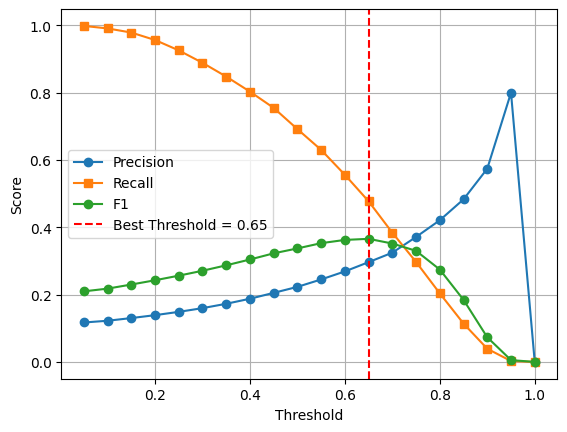

Best Threshold for F1     0.650
Best F1                   0.366
Best Recall               0.477
Best Precision            0.297


In [39]:
plot_precision_recall(model_logistic_resampled, predict_prob_logistic)

<h3>CV Best Parameters</h3>

In [40]:
pipe_logistic = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('log_reg', LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'))
])
param_grid_logistic = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__solver': ['liblinear'] 
}
model_logistic_best = find_and_evaluate_best(pipe_logistic, param_grid_logistic)

/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'log_reg__C': 100, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}
Best Cross-Validation F1 Score: 0.3319990053732681

Training

Accuracy: 0.6833417369552127

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79    180555
           1       0.22      0.68      0.33     23722

    accuracy                           0.68    204277
   macro avg       0.58      0.68      0.56    204277
weighted avg       0.86      0.68      0.74    204277


Test

Accuracy: 0.6843939690620716

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.22      0.69      0.34      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.57     51070
weighted avg       0.86      0.68      0.74     51070



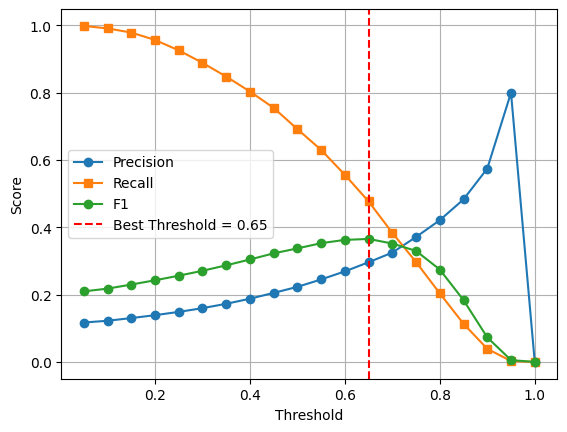

Best Threshold for F1     0.650
Best F1                   0.365
Best Recall               0.477
Best Precision            0.296


In [41]:
plot_precision_recall(model_logistic_best, predict_prob_logistic)

<h2>SVM</h2>

In [47]:
from sklearn.svm import SVC, LinearSVC

# model_svm = SVC(
#     kernel='rbf',
#     C=1.0,
#     gamma='scale',
#     random_state=42
# )

# model_svm.fit(X_train, y_train)

# The dataset is way too large for fitting a general SVM

In [48]:
model_svm_linear = LinearSVC(
    max_iter=10000,
    C=1.0,
    random_state=42
)

model_svm_linear.fit(X_train, y_train)

LinearSVC(max_iter=10000, random_state=42)

In [49]:
evaluate_model(model_svm_linear)


Training

Accuracy: 0.8838733680247899

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94    180555
           1       0.00      0.00      0.00     23722

    accuracy                           0.88    204277
   macro avg       0.44      0.50      0.47    204277
weighted avg       0.78      0.88      0.83    204277


Test

Accuracy: 0.8838652829449775

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45139
           1       0.00      0.00      0.00      5931

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070



In [50]:
model_svm_linear_resampled = LinearSVC(
    max_iter=10000,
    C=1.0,
    random_state=42
)

model_svm_linear_resampled.fit(X_train_resampled, y_train_resampled)

LinearSVC(max_iter=10000, random_state=42)

In [51]:
evaluate_model(model_svm_linear_resampled)


Training

Accuracy: 0.6803311190197624

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79    180555
           1       0.22      0.68      0.33     23722

    accuracy                           0.68    204277
   macro avg       0.58      0.68      0.56    204277
weighted avg       0.86      0.68      0.74    204277


Test

Accuracy: 0.6813785000979048

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.22      0.70      0.34      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.74     51070



In [52]:
pipe_svm_linear = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', LinearSVC(random_state=42))
])
param_grid_svm_linear = {
    'svm__C': [0.1, 1, 10, 100]
}
find_and_evaluate_best(pipe_svm_linear, param_grid_svm_linear)

Best Parameters: {'svm__C': 1}
Best Cross-Validation F1 Score: 0.33152615844773853

Training

Accuracy: 0.6803311190197624

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79    180555
           1       0.22      0.68      0.33     23722

    accuracy                           0.68    204277
   macro avg       0.58      0.68      0.56    204277
weighted avg       0.86      0.68      0.74    204277


Test

Accuracy: 0.6813785000979048

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.68      0.79     45139
           1       0.22      0.70      0.34      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.74     51070



Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('svm', LinearSVC(C=1, random_state=42))])

<h2>Decision Tree</h2>

In [53]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(
    criterion='gini',       
    max_depth=6,           
    min_samples_split=10,
    random_state=42
)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=42)

In [54]:
evaluate_model(model_tree)


Training

Accuracy: 0.8853566480807923

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94    180555
           1       0.62      0.03      0.06     23722

    accuracy                           0.89    204277
   macro avg       0.76      0.51      0.50    204277
weighted avg       0.86      0.89      0.84    204277


Test

Accuracy: 0.8850401409829646

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.60      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.74      0.51      0.50     51070
weighted avg       0.85      0.89      0.84     51070



In [55]:
model_tree_resampled = DecisionTreeClassifier(
    criterion='gini',       
    max_depth=6,           
    min_samples_split=10,
    random_state=42
)
model_tree_resampled.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=42)

In [56]:
evaluate_model(model_tree_resampled)


Training

Accuracy: 0.5928518629116347

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.58      0.72    180555
           1       0.17      0.66      0.27     23722

    accuracy                           0.59    204277
   macro avg       0.55      0.62      0.50    204277
weighted avg       0.84      0.59      0.67    204277


Test

Accuracy: 0.5875856667319366

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.58      0.71     45139
           1       0.17      0.66      0.27      5931

    accuracy                           0.59     51070
   macro avg       0.55      0.62      0.49     51070
weighted avg       0.84      0.59      0.66     51070



In [59]:
pipe_tree = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tree', DecisionTreeClassifier(random_state=42),)
])
param_grid_tree = {
    'tree__max_depth': [3, 5, 7, 9, None],
    'tree__min_samples_split': [2, 5, 10, 20],
    'tree__min_samples_leaf': [1, 5, 10],
    'tree__criterion': ['gini', 'entropy']
}
model_tree_best = find_and_evaluate_best(pipe_tree, param_grid_tree)

Best Parameters: {'tree__criterion': 'gini', 'tree__max_depth': 9, 'tree__min_samples_leaf': 5, 'tree__min_samples_split': 2}
Best Cross-Validation F1 Score: 0.2847958884829288

Training

Accuracy: 0.7669928577372881

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86    180555
           1       0.23      0.43      0.30     23722

    accuracy                           0.77    204277
   macro avg       0.57      0.62      0.58    204277
weighted avg       0.84      0.77      0.80    204277


Test

Accuracy: 0.7642059917759937

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86     45139
           1       0.23      0.43      0.30      5931

    accuracy                           0.76     51070
   macro avg       0.57      0.62      0.58     51070
weighted avg       0.84      0.76      0.79     51070



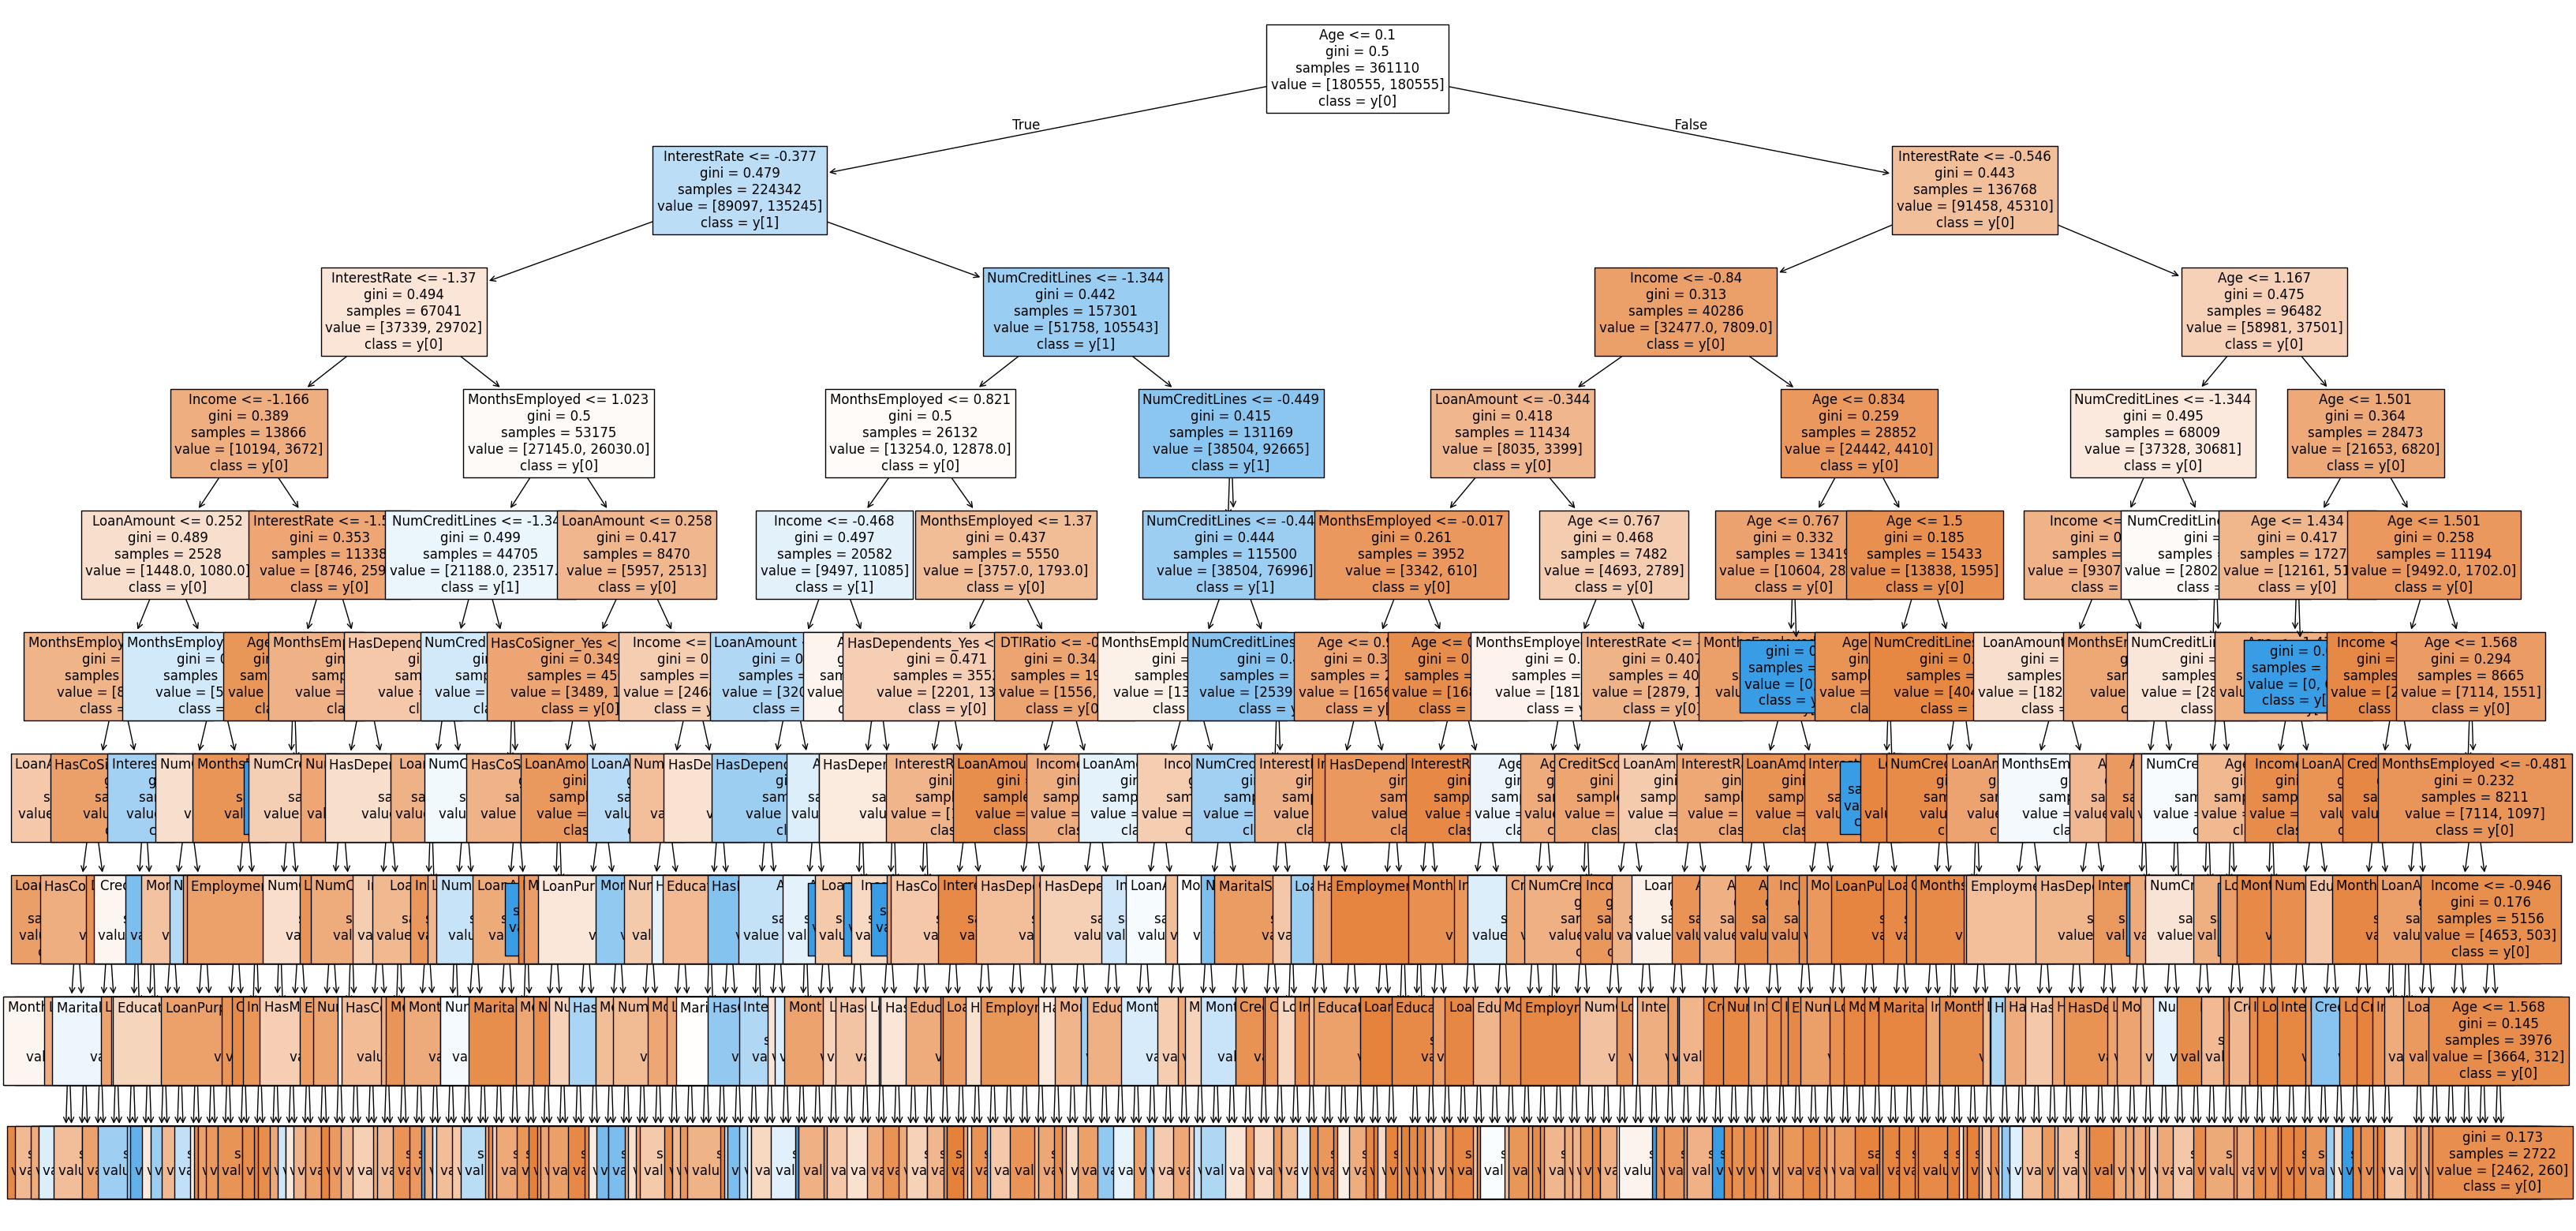

In [69]:
model_tree_best_model = model_tree_best.named_steps['tree']

plt.figure(figsize=(40, 20))
plot_tree(model_tree_best_model, filled=True, feature_names=X_train.columns, class_names=True, fontsize=12 )
plt.show()